In [3]:
from nptdms import TdmsFile as TF
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import datetime as dt
%matplotlib inline

In [5]:
file = TF("E:\\Data\\MolyRod\\MolyA\\13mm_together.tdms")
wlf = TF("E:\\Data\\MolyRod\\MolyA\\13mm_Spectrometer.tdms")

In [6]:
NIR = file.object("NIR_MP1_Norm").as_dataframe()
wls = wlf.object('Global', 'NIR_Wavelength').data
t = NIR['Time']
NIR = NIR.drop('Time', axis = 1)
df = NIR[:512]
df.columns = t
Trt = file.object("Spectrometer").as_dataframe()
Trt2 = wlf.object('Temperature').as_dataframe()

In [7]:
df.index = wls

In [26]:
df.columns[5000]

Timestamp('2018-01-04 19:10:09.254175+0000', tz='UTC')

Text(0,0.5,'Wavelength (nm)')

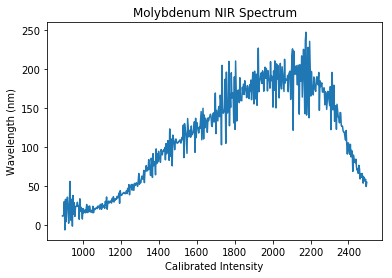

In [25]:
plt.plot(df[df.columns[5000]])
plt.title('Molybdenum NIR Spectrum')
plt.xlabel('Calibrated Intensity')
plt.ylabel('Wavelength (nm)')

In [24]:
df.columns = t
len(t)

15996

KeyboardInterrupt: 

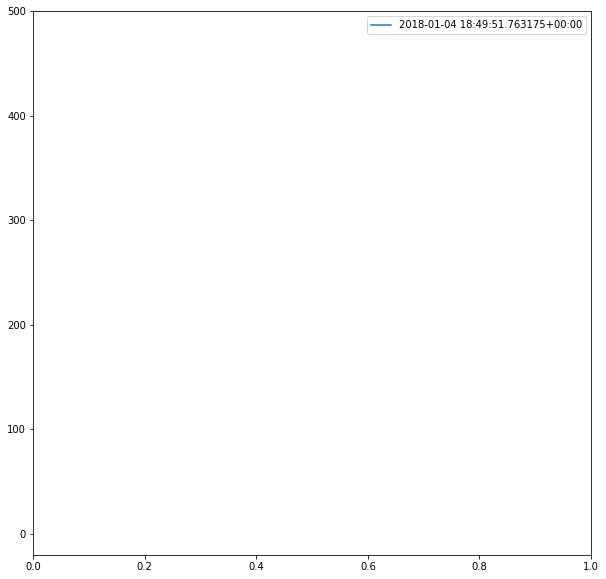

In [23]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()  
plt.xlabel(r'Wavelength')
plt.ylabel(r'Intensity')

# animation function
def animate(i):
    label = df.columns[i]
    xy = df[label]
    ax.clear()
    
    plt.ylim(-20,500)
    plot = plt.plot(xy, label = label)
    ax.legend()
    return plot  

anim = animation.FuncAnimation(fig, animate, frames=len(df.columns[5000:6000]), blit=False)
mywriter = animation.FFMpegWriter(fps=10, bitrate=4000)

anim.save("Mo.mp4", writer=mywriter)

In [38]:
len(df.columns)

22019

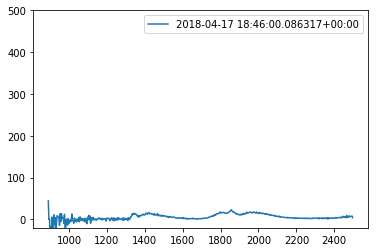

In [40]:
ax = plt.axes()
a = df.columns[-10100]
plt.ylim(-20,500)
plot = plt.plot(df[a], label = a)
ax.legend()

In [9]:
max(df)

Timestamp('2018-04-17 19:31:37.481029+0000', tz='UTC')

In [10]:
np.max(np.max(df))

3955.7392415987756

In [17]:
def twocolortemp(wl1,wl2,s):
    c2 = 14394264.78261
    wi1 = np.where(np.abs(s.index - wl1)<3.28)[0][1]
    wi2 = np.where(np.abs(s.index - wl2)<3.28)[0][1]
    e1 = s.iloc[wi1]
    e2 = s.iloc[wi2]
    num = c2*((1/wl1)-(1/wl2))
    den = -np.log(e1*wl1**5)+np.log(e2*wl2**5)
    #return e2
    return num/den

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


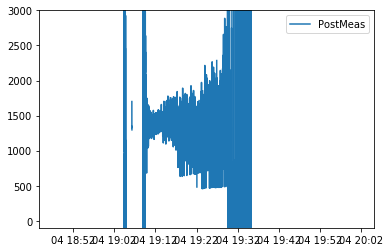

In [18]:
wa, wb = (1000,1300)
T = []
for col in df.columns:
    s = df[col]
    T.append(twocolortemp(wa,wb,s))
    #print(s)

plt.plot(df.columns, T, label='PostMeas')
#plt.plot(, Trt['Color Temp 1-2'])
#plt.plot(Trt2['Time'], Trt2['Temp'+str(wa)+'-'+str(wb)], label='RealTime')
plt.ylim(-100,3000)
#plt.xlim(8000,10000)
plt.legend()

In [285]:
ws= np.arange(1050,1950,90)
i = pd.MultiIndex.from_product((ws,ws))
sweepdf = pd.DataFrame(columns = i)
runtime = []
rightnow = dt.datetime.now()
for pos, pair in enumerate(i):
    T=[]
    wa, wb = pair
    for col in df.columns:
        s=df[col]
        T.append(twocolortemp(wa,wb,s))
    sweepdf[pair] = T
    
    deltat = dt.datetime.now()-rightnow
    rightnow = dt.datetime.now()
    runtime.append([rightnow,deltat.total_seconds()])
    eta = rightnow + (len(i)-pos)*deltat
    print('eta: '+eta)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


2018-09-21 09:18:44.702682
2018-09-21 09:17:53.697682
2018-09-21 09:19:31.717384
2018-09-21 09:18:23.208524
2018-09-21 09:22:27.187968
2018-09-21 09:18:48.862176
2018-09-21 09:18:19.789231
2018-09-21 09:18:13.584573
2018-09-21 09:18:37.767084
2018-09-21 09:18:07.311956
2018-09-21 09:18:40.621323
2018-09-21 09:18:34.320693
2018-09-21 09:18:34.587693
2018-09-21 09:18:24.290725
2018-09-21 09:18:34.644682
2018-09-21 09:18:31.548424
2018-09-21 09:18:17.096979
2018-09-21 09:18:29.614155
2018-09-21 09:18:04.462748
2018-09-21 09:18:16.681896
2018-09-21 09:18:09.229167
2018-09-21 09:18:17.710047
2018-09-21 09:18:19.053126
2018-09-21 09:18:21.081360
2018-09-21 09:18:07.682051
2018-09-21 09:18:16.042811
2018-09-21 09:18:01.041386
2018-09-21 09:18:21.615384
2018-09-21 09:18:13.000581
2018-09-21 09:18:37.987029
2018-09-21 09:17:50.483343
2018-09-21 09:17:32.771523
2018-09-21 09:17:16.830936
2018-09-21 09:17:17.102936
2018-09-21 09:16:57.000993
2018-09-21 09:17:01.951455
2018-09-21 09:16:58.051000
2

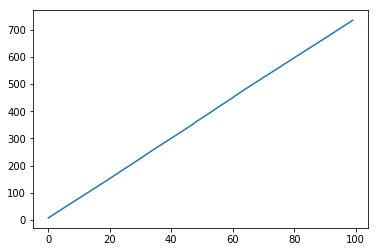

In [282]:
plt.plot(np.array(runtime)[:,1])

In [283]:
runtime

[[datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 7.419],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 14.665],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 21.945],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 29.177],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 36.497],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 43.751],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 51.012],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 58.255],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 65.474],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 72.73],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 79.95],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 87.276],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 94.524],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 101.773],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 109.014],
 [datetime.datetime(2018, 9, 20, 17, 16, 26, 990737), 11

In [273]:
sweepdf.index=t

In [27]:
plt.plot(sweepdf[(1050,1410)].iloc[3577:10000])
plt.ylim(0,2000)

NameError: name 'sweepdf' is not defined

In [264]:
max(wls)

2548.0920582389967

In [157]:
np.e**(6.626176e-34*3e8/(1800*1.3806e-23*1e-6))

2978.425630449069

In [154]:
1800*1.3806e-23*1e-6

2.4850799999999997e-26

In [182]:
len(T)

15996

In [235]:
help(pd.MultiIndex.from_product)

Help on method from_product in module pandas.core.indexes.multi:

from_product(iterables, sortorder=None, names=None) method of builtins.type instance
    Make a MultiIndex from the cartesian product of multiple iterables
    
    Parameters
    ----------
    iterables : list / sequence of iterables
        Each iterable has unique labels for each level of the index.
    sortorder : int or None
        Level of sortedness (must be lexicographically sorted by that
        level).
    names : list / sequence of strings or None
        Names for the levels in the index.
    
    Returns
    -------
    index : MultiIndex
    
    Examples
    --------
    >>> numbers = [0, 1, 2]
    >>> colors = [u'green', u'purple']
    >>> MultiIndex.from_product([numbers, colors],
                                 names=['number', 'color'])
    MultiIndex(levels=[[0, 1, 2], [u'green', u'purple']],
               labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
               names=[u'number', u'color']